# Séries temporais 2

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 2) Autocorrelação;
- 3) Modelos AR;
- 4) Modelos MA;
- 5) Modelos ARMA;
- 6) Modelos ARIMA;
- 7) Dá pra melhorar?

______

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

# pra ignorar alguns avisos que podem aparecer
import warnings
warnings.filterwarnings("ignore")

Em nossos exemplos, vamos usar a seguinte série temporal:

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [13]:
df_flights = sns.load_dataset('flights')

In [14]:
len(df_flights)

144

In [15]:
df_flights.shape[0]

144

In [16]:
pd.date_range('1949-01', periods=len(df_flights), freq='M')

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [17]:
df_flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [19]:
df_flights.index = pd.date_range('1949-01', periods=len(df_flights), freq='M')

In [20]:
df_flights

,year,month,passengers
1949-01-31,1949,Jan,112
1949-02-28,1949,Feb,118
1949-03-31,1949,Mar,132
1949-04-30,1949,Apr,129
1949-05-31,1949,May,121
...,...,...,...
1960-08-31,1960,Aug,606
1960-09-30,1960,Sep,508
1960-10-31,1960,Oct,461
1960-11-30,1960,Nov,390


## Outra opção pra criar os índices...

In [22]:
df_flights = sns.load_dataset('flights')

In [24]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [25]:
df_flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [36]:
def calcula_data(row):
    
    year = row["year"]
    month = row["month"]

    string_data = f"{month}, {year}"

    return dt.datetime.strptime(string_data, "%b, %Y")

In [38]:
df_flights["data_dt"] = df_flights.apply(calcula_data, axis=1)

In [42]:
df_flights = df_flights.sort_values("data_dt")

In [45]:
df_flights = df_flights.set_index("data_dt")

In [46]:
df_flights

,year,month,passengers
data_dt,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


In [48]:
# dt.datetime.strptime("16/08/2021", "%d/%m/%Y")

In [47]:
# dt.datetime.strptime("16/08/2021 16:00", "%d/%m/%Y %H:%M")

Voltando pro método inicial

In [49]:
df_flights = sns.load_dataset('flights')
df_flights.index = pd.date_range('1949-01', periods=len(df_flights), freq='M')

In [50]:
df_flights

,year,month,passengers
1949-01-31,1949,Jan,112
1949-02-28,1949,Feb,118
1949-03-31,1949,Mar,132
1949-04-30,1949,Apr,129
1949-05-31,1949,May,121
...,...,...,...
1960-08-31,1960,Aug,606
1960-09-30,1960,Sep,508
1960-10-31,1960,Oct,461
1960-11-30,1960,Nov,390


In [51]:
passageiros = df_flights["passengers"]

passageiros

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: passengers, Length: 144, dtype: int64

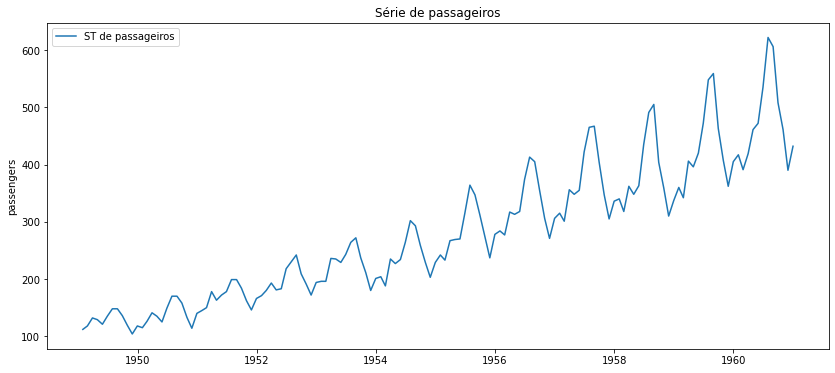

In [78]:
plt.figure(figsize=(14, 6))
plt.title("Série de passageiros")

sns.lineplot(x=passageiros.index, y=passageiros, label="ST de passageiros")
# sns.lineplot(x=passageiros.shift(1).index, y=passageiros.shift(1), label="ST de passageiros shift 1")
# sns.lineplot(x=passageiros.shift(12).index, y=passageiros.shift(12), label="ST de passageiros shift 13")

plt.legend()
plt.show()

## AUTORREGRESSIVO

_____
_____
_____

## 2) Autocorrelação

Um dos conceitos mais importantes que permeará nossos modelos autorregressivos será o de **autocorrelação**, que nada mais é que a **correlação da série temporal com uma cópia dela mesma**, mas de uma forma **defasada** (ou seja, tomando cópias intervalados por períodos denominados **lags**):

<img src="https://i1.wp.com/www.business-science.io/assets/lag-explanation.PNG?w=584" width=400>

A depender do sinal da autocorreção, temos comportamentos diferentes:

- autocorrelação positiva: **momentum** ou **trend following**
- autocorrelação negativa: **mean reversion**

<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Positive-and-negative-autocorrelation.png" width=450>

Para visualizar a autocorrelação, é muito comum que utilizemos os plots **ACF** e **PACF**:

____

### 2.1) Função de Autocorrelação - Auto Correlation Function (ACF)

A função de autocorrelação, ACF, é calculada considerando **todos os instantes de tempo intermediários dentro do lag a partir do primeiro instante de tempo**.

É muito comum visualizá-la com auxílio da biblioteca statsmodels:

In [53]:
# importando o método
from statsmodels.graphics.tsaplots import plot_acf

In [55]:
passageiros

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: passengers, Length: 144, dtype: int64

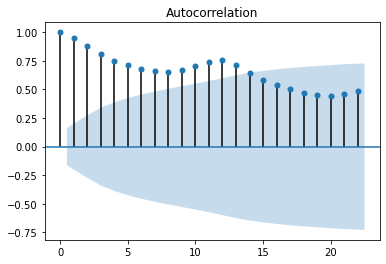

In [64]:
plot_acf(passageiros)

plt.show()

____

### 2.2) Função de Autocorrelação Parcial - Partial Auto Correlation Function (PACF)

A função de autocorrelação parcial, PACF, é calculada considerando **apenas os instantes de tempo do lag, sem considerar os instantes intermediários**.

Também há um método do statsmodels para visualizarmos a PACF:

In [68]:
# importando o método
from statsmodels.graphics.tsaplots import plot_pacf

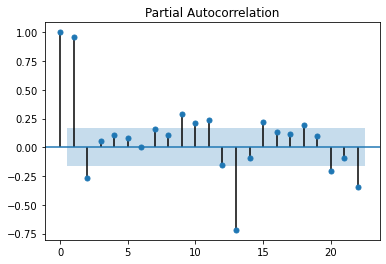

In [69]:
plot_pacf(passageiros)

plt.show()

____

### 2.3) Estacionariedade

Uma série temporal é dita **estacionária** quando ela se desenvolve no tempo aleatoriamente ao redor de uma **média constante**, e com **variância constante**, refletindo um equilíbrio estável:

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=550><br>

<img src="https://miro.medium.com/max/1147/1*xdblkZyg6YmmReAkZHUksw.png" width=650>


> -**Random walks** são exemplos de séries **não estacionárias**:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Random-Walk-Line-Plot.png" width=450>

> **Séries sazonais** também não são estacionárias:

<img src="https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png" width=450>

> - **White noise** é estacionário:

<img src="https://www.researchgate.net/publication/279249485/figure/fig10/AS:272660147994627@1442018653078/An-example-of-a-stationary-time-series-specifically-a-series-of-uncorrelated-white.png" width=500>

Para avaliarmos se uma série temporal é ou não estacionária, fazemos o [teste de Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test).

In [79]:
from statsmodels.tsa.stattools import adfuller

adfuller(passageiros)

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [80]:
# p-value menor que 5% e rejeitamos a hipótese nula que a 
# série é um random walk com 95% de confiança

p = adfuller(passageiros)[1]

print("\np-value:", p)

# interpretação do teste
# nível de confiança de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser não-estacionaria")
else:
    print("\nRejeição da H_0: amostra é estacionária")


p-value: 0.9918802434376409

Falha em rejeitar H_0: amostra parece ser não-estacionaria


Para **tornarmos uma série não-estacionária estacionária**, há um procedimento muito simples que modemos tentar fazer:
tomar as variações entre diferentes instantes de tempo, o que fazemos com o método `diff()`, que é bem similar ao `pct_change()`, exceto pelo fato de que não há a divisão pelo instante anterior:

> `diff()`: $P_t - P_{t-1}$

> `pct_change()`: $\frac{P_t - P_{t-1}}{P_{t-1}}$

In [81]:
passageiros

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: passengers, Length: 144, dtype: int64

In [84]:
difs = passageiros.diff().dropna()

difs

1949-02-28     6.0
1949-03-31    14.0
1949-04-30    -3.0
1949-05-31    -8.0
1949-06-30    14.0
              ... 
1960-08-31   -16.0
1960-09-30   -98.0
1960-10-31   -47.0
1960-11-30   -71.0
1960-12-31    42.0
Freq: M, Name: passengers, Length: 143, dtype: float64

In [85]:
difs_pct = passageiros.pct_change().dropna()

difs_pct

1949-02-28    0.053571
1949-03-31    0.118644
1949-04-30   -0.022727
1949-05-31   -0.062016
1949-06-30    0.115702
                ...   
1960-08-31   -0.025723
1960-09-30   -0.161716
1960-10-31   -0.092520
1960-11-30   -0.154013
1960-12-31    0.107692
Freq: M, Name: passengers, Length: 143, dtype: float64

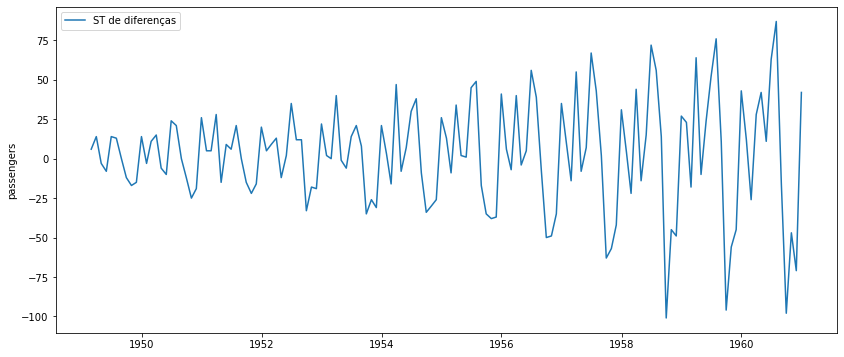

In [87]:
plt.figure(figsize=(14, 6))

sns.lineplot(x=difs.index, y=difs, label="ST de diferenças")

plt.legend()
plt.show()

Ou podemos usar a série de variacoes percentuais:


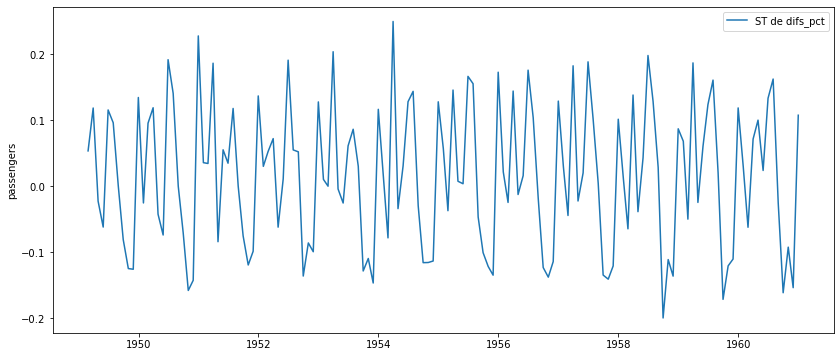

In [88]:
difs_pct = passageiros.pct_change().dropna()

plt.figure(figsize=(14, 6))

sns.lineplot(x=difs_pct.index, y=difs_pct, label="ST de difs_pct")

plt.legend()
plt.show()

Agora que conhecemos o importanto processo de estacionaridade, vamos introduzir dois procedimentos que são utilizados **para modelar processos estacionários**.

In [89]:
p = adfuller(difs_pct)[1]

print("\np-value:", p)

# interpretação do teste
# nível de significancia de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser não-estacionaria")
else:
    print("\nRejeição da H_0: amostra é estacionária")


p-value: 0.04239503972523865

Rejeição da H_0: amostra é estacionária


____
____
____

## 3) Modelos AR

O primeiro modelo que vamos tratar é o **Modelo AutoRegressivo** (daí o **AR**). 

O objetivo deste (e dos demais modelos que veremos) é **capturar o padrão por trás da série e prever o comportamento futuro a partir do passado**.

Este modelo estabelece uma relação muito precisa entre diferentes instantes de tempo, expressa a seguir como o **modelo autorregressivo de ordem $p$ - $\text{AR}(p)$:**


$$R_t = \mu + \sum_{i=1}^p \phi_i R_{t-i} + \epsilon_t \ , $$

Ou seja,

$$R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \cdots + \phi_p R_{t-p} + \epsilon_t \ , $$

Onde:

- $R_t$ é o instante atual;
- $p$ é o número de lags considerado no modelo (também chamado de **ordem** do modelo);
- $R_{t-p}$ é o instante de tempo passados p lags;
- $\phi_p$ é o respectivo coeficiente da PACF.

Um bom modelo será um que utiliza um número $p$ de lags da PACF fora do cone de confiança (ou seja, estatisticamente significantes).


A primeira coisa antes de construirmos nosso modelo, será definir qual será nosso **conjunto de teste**:

In [96]:
difs_pct.shape[0]*0.3

42.9

In [97]:
num_test = 30

difs_pct_test = difs_pct.iloc[-num_test:]

In [98]:
difs_pct_test

1958-07-31    0.128736
1958-08-31    0.028513
1958-09-30   -0.200000
1958-10-31   -0.111386
1958-11-30   -0.136490
1958-12-31    0.087097
1959-01-31    0.068249
1959-02-28   -0.050000
1959-03-31    0.187135
1959-04-30   -0.024631
1959-05-31    0.060606
1959-06-30    0.123810
1959-07-31    0.161017
1959-08-31    0.020073
1959-09-30   -0.171735
1959-10-31   -0.120950
1959-11-30   -0.110565
1959-12-31    0.118785
1960-01-31    0.029630
1960-02-29   -0.062350
1960-03-31    0.071611
1960-04-30    0.100239
1960-05-31    0.023861
1960-06-30    0.133475
1960-07-31    0.162617
1960-08-31   -0.025723
1960-09-30   -0.161716
1960-10-31   -0.092520
1960-11-30   -0.154013
1960-12-31    0.107692
Freq: M, Name: passengers, dtype: float64

Para treinarmos um modelo $\text{AR}(p)$ para nossa série temporal, vamos utilizar o submódulo `statsmodels.tsa.arima_model` da [statsmodels](https://www.statsmodels.org/stable/tsa.html)


In [99]:
from statsmodels.tsa.arima_model import ARMA

**Identificando a ordem $p$ do modelo $\text{AR}(p)$**

O primeiro passo para a construção do modelo é a determinação da **ordem $p$**, ou seja, o número de lags em termos dos quais vamos modelar o target.

Para fazer isso, a principal abordagem é avaliar o gráfico da **PACF**, e escolher lags que sejam estatisticamente dignificantes! 

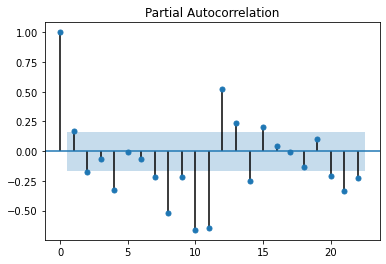

In [101]:
plot_pacf(difs_pct)
plt.show()

ARMA(p, 0) = AR(p)

ARMA(0, q) = MA(q)

In [110]:
modelo = ARMA(difs_pct, order=(4, 0)).fit()

Após fitarmos o modelo, podemos dar uma olhada em informações com o método `summary()`:

In [111]:
print(modelo.summary())

                              ARMA Model Results                              
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(4, 0)   Log Likelihood                 129.388
Method:                       css-mle   S.D. of innovations              0.098
Date:                Mon, 16 Aug 2021   AIC                           -246.776
Time:                        21:52:29   BIC                           -228.999
Sample:                    02-28-1949   HQIC                          -239.552
                         - 12-31-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0158      0.006      2.666      0.008       0.004       0.027
ar.L1.passengers     0.1722      0.079      2.187      0.029       0.018       0.326
ar.L2.passengers    -0.2218 

$R_t = 0.0153 + 0.2026 R_{t-1}  -0.1774 R_{t-2} + \epsilon$

Agora, podemos usar o modelo para fazer predições **nos dados de teste**:

In [112]:
difs_pct_test.head(7)

1958-07-31    0.128736
1958-08-31    0.028513
1958-09-30   -0.200000
1958-10-31   -0.111386
1958-11-30   -0.136490
1958-12-31    0.087097
1959-01-31    0.068249
Freq: M, Name: passengers, dtype: float64

In [113]:
difs_pct_test.index[0], difs_pct_test.index[-1]

(Timestamp('1958-07-31 00:00:00', freq='M'),
 Timestamp('1960-12-31 00:00:00', freq='M'))

In [114]:
preds = modelo.predict(start=difs_pct_test.index[0], end=difs_pct_test.index[-1])

In [115]:
preds.head(7)

1958-07-31    0.000186
1958-08-31    0.012935
1958-09-30   -0.017262
1958-10-31   -0.086267
1958-11-30    0.003649
1958-12-31    0.014665
1959-01-31    0.135181
Freq: M, dtype: float64

Vamos visualizar as predições juntamente com os valores reais:

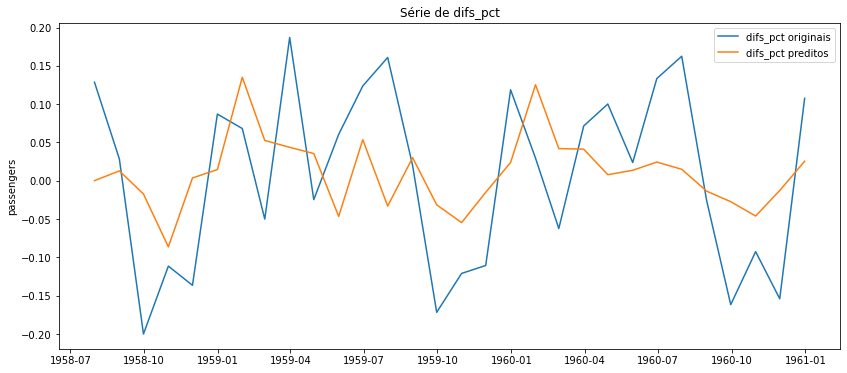

In [116]:
plt.figure(figsize=(14, 6))
plt.title("Série de difs_pct")

sns.lineplot(x=difs_pct_test.index, y=difs_pct_test, label="difs_pct originais")

preds = modelo.predict(start=difs_pct_test.index[0], 
                       end=difs_pct_test.index[-1])
sns.lineplot(x=preds.index, y=preds, label="difs_pct preditos")

plt.legend()
plt.show()

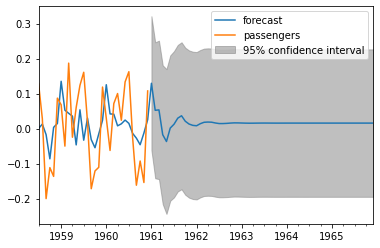

In [122]:
modelo.plot_predict(start=difs_pct_test.index[0], 
                    end=(difs_pct_test.index[-1] + dt.timedelta(days=30*60)))

plt.show()

O modelo parece que não funcionou tão bem...

Vamos conhecer modelos mais complexos agora!

# tentando passar os dados originais

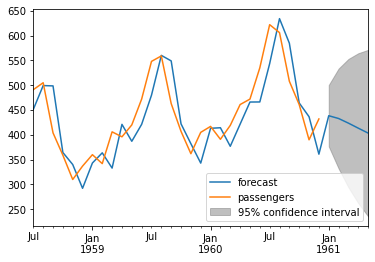

In [128]:
modelo = ARMA(passageiros, order=(2, 0)).fit()

num_test = 30

passageiros_test = passageiros.iloc[-num_test:]

modelo.plot_predict(start=passageiros_test.index[0], 
                    end=(passageiros_test.index[-1] + dt.timedelta(days=30*5)))

plt.show()

______
_______
_______

## 4) Modelos MA

Vamos tratar agora do **Modelo de Média Móvel** (**Moving Average**, daí o **MA**). 

Diferente dos modelos AR, os modelos MA estabelecem uma relação não entre os valores de diferentes instantes de tempo, mas sim entre **os ruídos de diferentes instantes de tempo**. Esta rellação é xpressa a seguir como o **modelo de média móvel de ordem $q$ - $\text{MA}(q)$:**

$$R_t = \mu + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t \ , $$

Ou seja,

$$R_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t \ , $$

Onde:

- $R_t$ é o instante atual;
- $q$ é o número de lags considerado no modelo (também chamado de **ordem** do modelo);
- $\epsilon_{t-q}$ é o ruído entre o instante atual e o instante após q lags;
- $\theta_q$ é o respectivo coeficiente da ACF.

Um bom modelo será um que utiliza um número $q$ de lags da ACF fora do cone de confiança (ou seja, estatisticamente significantes).


Vamos construir agora um modelo MA para nossa série temporal!

A primeira coisa é avaliarmos a ordem adequada com base na ACF:

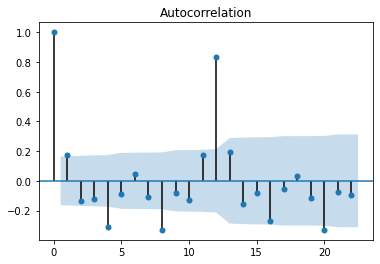

In [129]:
plot_acf(difs_pct)
plt.show()

In [131]:
modelo = ARMA(difs_pct, order=(0, 1)).fit()

In [132]:
print(modelo.summary())

                              ARMA Model Results                              
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 119.411
Method:                       css-mle   S.D. of innovations              0.105
Date:                Mon, 16 Aug 2021   AIC                           -232.823
Time:                        22:06:54   BIC                           -223.934
Sample:                    02-28-1949   HQIC                          -229.211
                         - 12-31-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0154      0.011      1.412      0.158      -0.006       0.037
ma.L1.passengers     0.2453      0.099      2.488      0.013       0.052       0.439
                            

In [133]:
difs_pct_test.head()

1958-07-31    0.128736
1958-08-31    0.028513
1958-09-30   -0.200000
1958-10-31   -0.111386
1958-11-30   -0.136490
Freq: M, Name: passengers, dtype: float64

In [134]:
modelo.predict(start=difs_pct_test.index[0], end=difs_pct_test.index[-1]).head()

1958-07-31    0.057315
1958-08-31    0.032933
1958-09-30    0.014327
1958-10-31   -0.037168
1958-11-30   -0.002796
Freq: M, dtype: float64

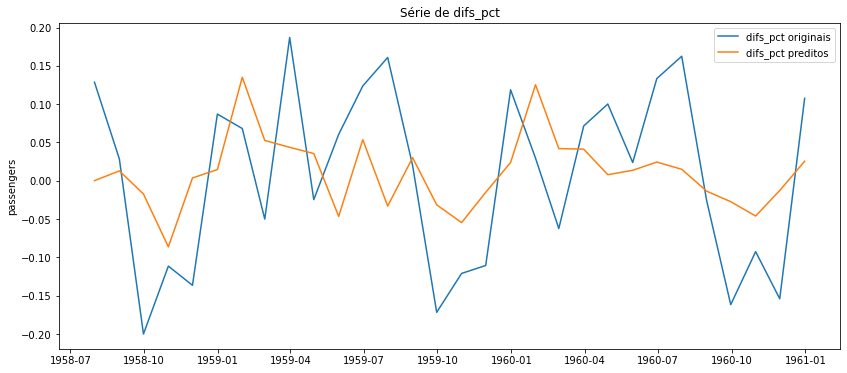

In [135]:
plt.figure(figsize=(14, 6))
plt.title("Série de difs_pct")

sns.lineplot(x=difs_pct_test.index, y=difs_pct_test, label="difs_pct originais")
sns.lineplot(x=preds.index, y=preds, label="difs_pct preditos")

plt.legend()
plt.show()

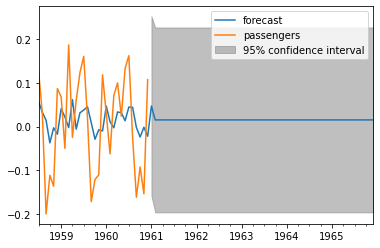

In [136]:
modelo.plot_predict(start=difs_pct_test.index[0], 
                    end=(difs_pct_test.index[-1] + dt.timedelta(days=30*60)))

plt.show()

O resultado não foi muito melhor... Será que é possível melhorar com uma combinação de ambos os modelos? Vamos avaliar isto agora!


_____
______
_____

## 5) Modelos ARMA

Os modelos ARMA, como o nome indica, são modelos compostos por ambas as componentes AR e MA. O modelo $\text{ARMA}(p, q)$ é dado por:

$$R_t = \mu + \sum_{i=1}^p \phi_i R_{t-i} + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t \ . $$

Uma pergunta natural é: em que caso usar qual modelo?

Uma resposta simples é: tente diferentes modelos!

Uma resposta mais educada seria:

<img src="https://image1.slideserve.com/1710867/slide34-l.jpg" width=400>

Para saber mais sobre estacionariedade como hipótese para os modelo AR e MA, [clique aqui.](https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary)

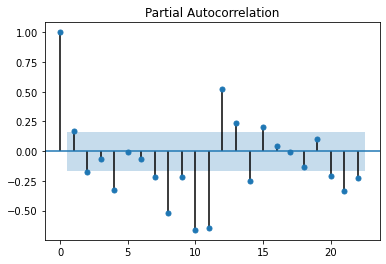

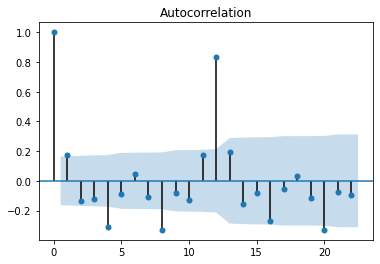

In [137]:
plot_pacf(difs_pct)
plt.show()

plot_acf(difs_pct)
plt.show()

In [138]:
modelo = ARMA(difs_pct, order=(1, 1)).fit()

In [139]:
print(modelo.summary())

                              ARMA Model Results                              
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(1, 1)   Log Likelihood                 123.159
Method:                       css-mle   S.D. of innovations              0.102
Date:                Mon, 16 Aug 2021   AIC                           -238.319
Time:                        22:13:21   BIC                           -226.467
Sample:                    02-28-1949   HQIC                          -233.503
                         - 12-31-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0155      0.010      1.568      0.117      -0.004       0.035
ar.L1.passengers    -0.6137      0.124     -4.956      0.000      -0.856      -0.371
ma.L1.passengers     0.8685 

In [140]:
preds = modelo.predict(start=difs_pct_test.index[0], end=difs_pct_test.index[-1])

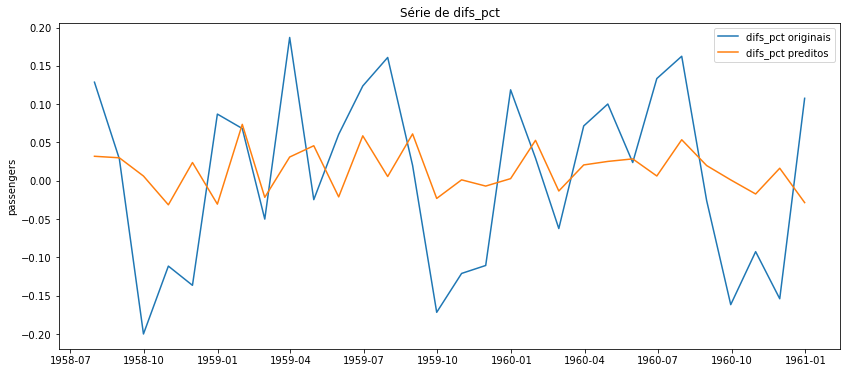

In [141]:
plt.figure(figsize=(14, 6))
plt.title("Série de difs_pct")

sns.lineplot(x=difs_pct_test.index, y=difs_pct_test, label="difs_pct originais")
sns.lineplot(x=preds.index, y=preds, label="difs_pct preditos")

plt.legend()
plt.show()

Para finalizar, vamos ver um último modelo, mais complexo!

________
______
______

## 6) Modelos ARIMA

Por fim, chegamos ao modelo mais complexo que aprenderemos, o **AutoRegressive Integrated Moving Average**.

Estes modelos se diferenciam do ARMA ao incorporar o procedimento de **diferenciação** da série temporal **original e não estacionária**. Este procedimento faz com que a série se torne estacionária para que o forecasting seja feito. Então, como passo final, a diferenciação é revertida com a **integração**, o que faz com que as predições sejam feitas em termos dos valores originais.

Assim, poderemos com o ARIMA utilizar diretamente as séries de preços!

Os modelos $\text{ARIMA}(p, d, q)$ têm as seguintes componentes:

- p: número de defasagens autoregressivas;
- d: ordem da difereenciação das defasagens;
- q: número de defasagens das médias móveis.

Vamos à construção do modelo!

In [142]:
from statsmodels.tsa.arima_model import ARIMA

In [144]:
num_test = 30

passageiros_test = passageiros.iloc[-num_test:]

In [145]:
modelo = ARIMA(passageiros, order=(1, 1, 1)).fit()

In [146]:
print(modelo.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Mon, 16 Aug 2021   AIC                           1402.145
Time:                        22:17:03   BIC                           1413.997
Sample:                    02-28-1949   HQIC                          1406.961
                         - 12-31-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.passengers  

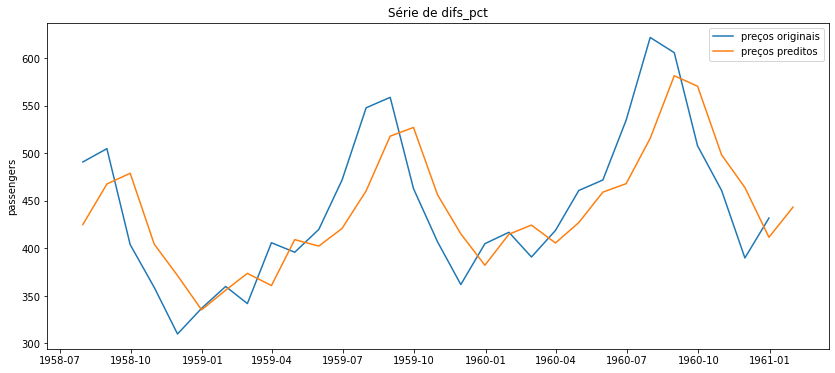

In [147]:
preds = modelo.predict(start=passageiros_test.index[0], 
                       end=passageiros_test.index[-1] + dt.timedelta(days=2), typ="levels")

plt.figure(figsize=(14, 6))
plt.title("Série de difs_pct")

sns.lineplot(x=passageiros_test.index, y=passageiros_test, label="preços originais")
sns.lineplot(x=preds.index, y=preds, label="preços preditos")

plt.legend()
plt.show()

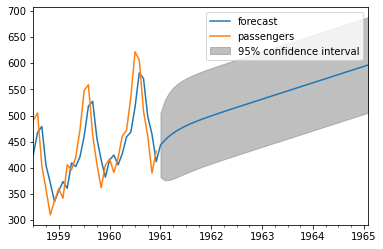

In [148]:
modelo.plot_predict(start=passageiros_test.index[0], 
                    end=passageiros_test.index[-1] + dt.timedelta(days=50*30))
plt.show()

Aumentando a ordem do modelo...

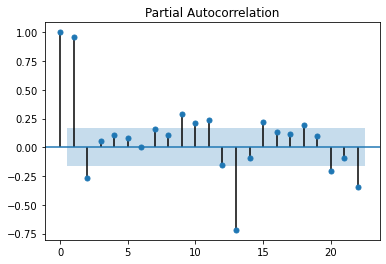

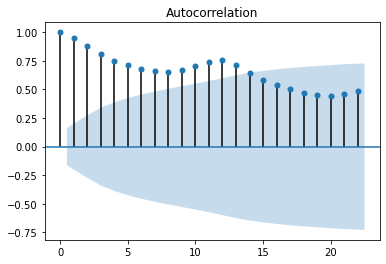

In [149]:
plot_pacf(passageiros)
plt.show()

plot_acf(passageiros)
plt.show()

In [164]:
modelo = ARIMA(passageiros, order=(2, 1, 11)).fit()

print(modelo.summary())

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                ARIMA(2, 1, 11)   Log Likelihood                -629.738
Method:                       css-mle   S.D. of innovations             17.873
Date:                Mon, 16 Aug 2021   AIC                           1289.476
Time:                        22:30:47   BIC                           1333.919
Sample:                    02-28-1949   HQIC                          1307.535
                         - 12-31-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6813      0.862      3.112      0.002       0.993       4.370
ar.L1.D.passengers      0.9658      0.034     28.534      0.000       0.900       1.032
ar.L2.D.passenge

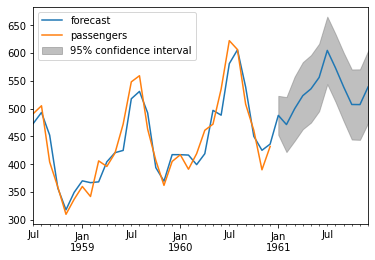

In [165]:
modelo.plot_predict(start=passageiros_test.index[0], 
                    end=passageiros_test.index[-1] + dt.timedelta(days=12*30))
plt.show()

                             ARIMA Model Results                              
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Mon, 16 Aug 2021   AIC                           1402.145
Time:                        22:29:01   BIC                           1413.997
Sample:                    02-28-1949   HQIC                          1406.961
                         - 12-31-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.passengers  

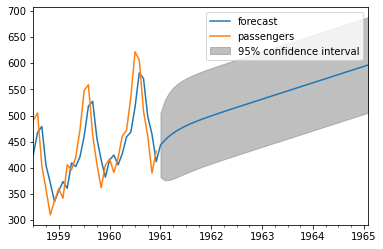

In [162]:
modelo = ARIMA(passageiros, order=(1, 1, 1)).fit()

print(modelo.summary())

modelo.plot_predict(start=passageiros_test.index[0], 
                    end=passageiros_test.index[-1] + dt.timedelta(days=50*30))
plt.show()

_______
_____
_____

## 7) Dá pra melhorar?

Atualmente, os principais modelos para previsão de séries temporais envolvem **redes neurais**, em particular uma arquitetura específica denominada **Redes Neurais Recorrentes** (RNNs), que são especializadas em modelar dados sequenciais:

<img src="https://www.researchgate.net/profile/Chen_Zhenyu5/publication/332662013/figure/fig3/AS:751758288637957@1556244551951/RNN-and-LSTM-comparison-chart.jpg" width=500>

Para saber mais sobre estes modelos aplicados a séries temporais, [clique aqui](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/), [aqui](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) e [aqui!](https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f)

Embora modelos mais complexos possam produzir melhores resultados, lembre-se que, fundamentalmente, uma série temporal pode não ser previsível. Assim, o principal trabalho é o de **análise**, para que seja possamos entender o quão justificáveis serão nossas predições.

_____